In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/jhhalls/Online-Exam-Ds0124/main/Sales_LinReg.csv")

In [3]:
df.head()

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6


In [4]:
df.shape

(305, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Republic  295 non-null    float64
 1   NDTV      300 non-null    float64
 2   TV5       305 non-null    float64
 3   TV9       297 non-null    float64
 4   AajTak    300 non-null    float64
 5   sales     305 non-null    float64
dtypes: float64(6)
memory usage: 14.4 KB


In [6]:
df.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [7]:
df['Republic']= df['Republic'].fillna(df['Republic'].mean())
df['NDTV']= df['NDTV'].fillna(df['NDTV'].mean())
df['TV5']= df['TV5'].fillna(df['TV5'].mean())
df['TV9']= df['TV9'].fillna(df['TV9'].mean())
df['AajTak']= df['AajTak'].fillna(df['AajTak'].mean())


In [8]:
#pldf.info()

In [9]:
df.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,85.881799,14.659861,20.290023,21.127576,15.722872,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,148.136610,21.300000,26.200000,24.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


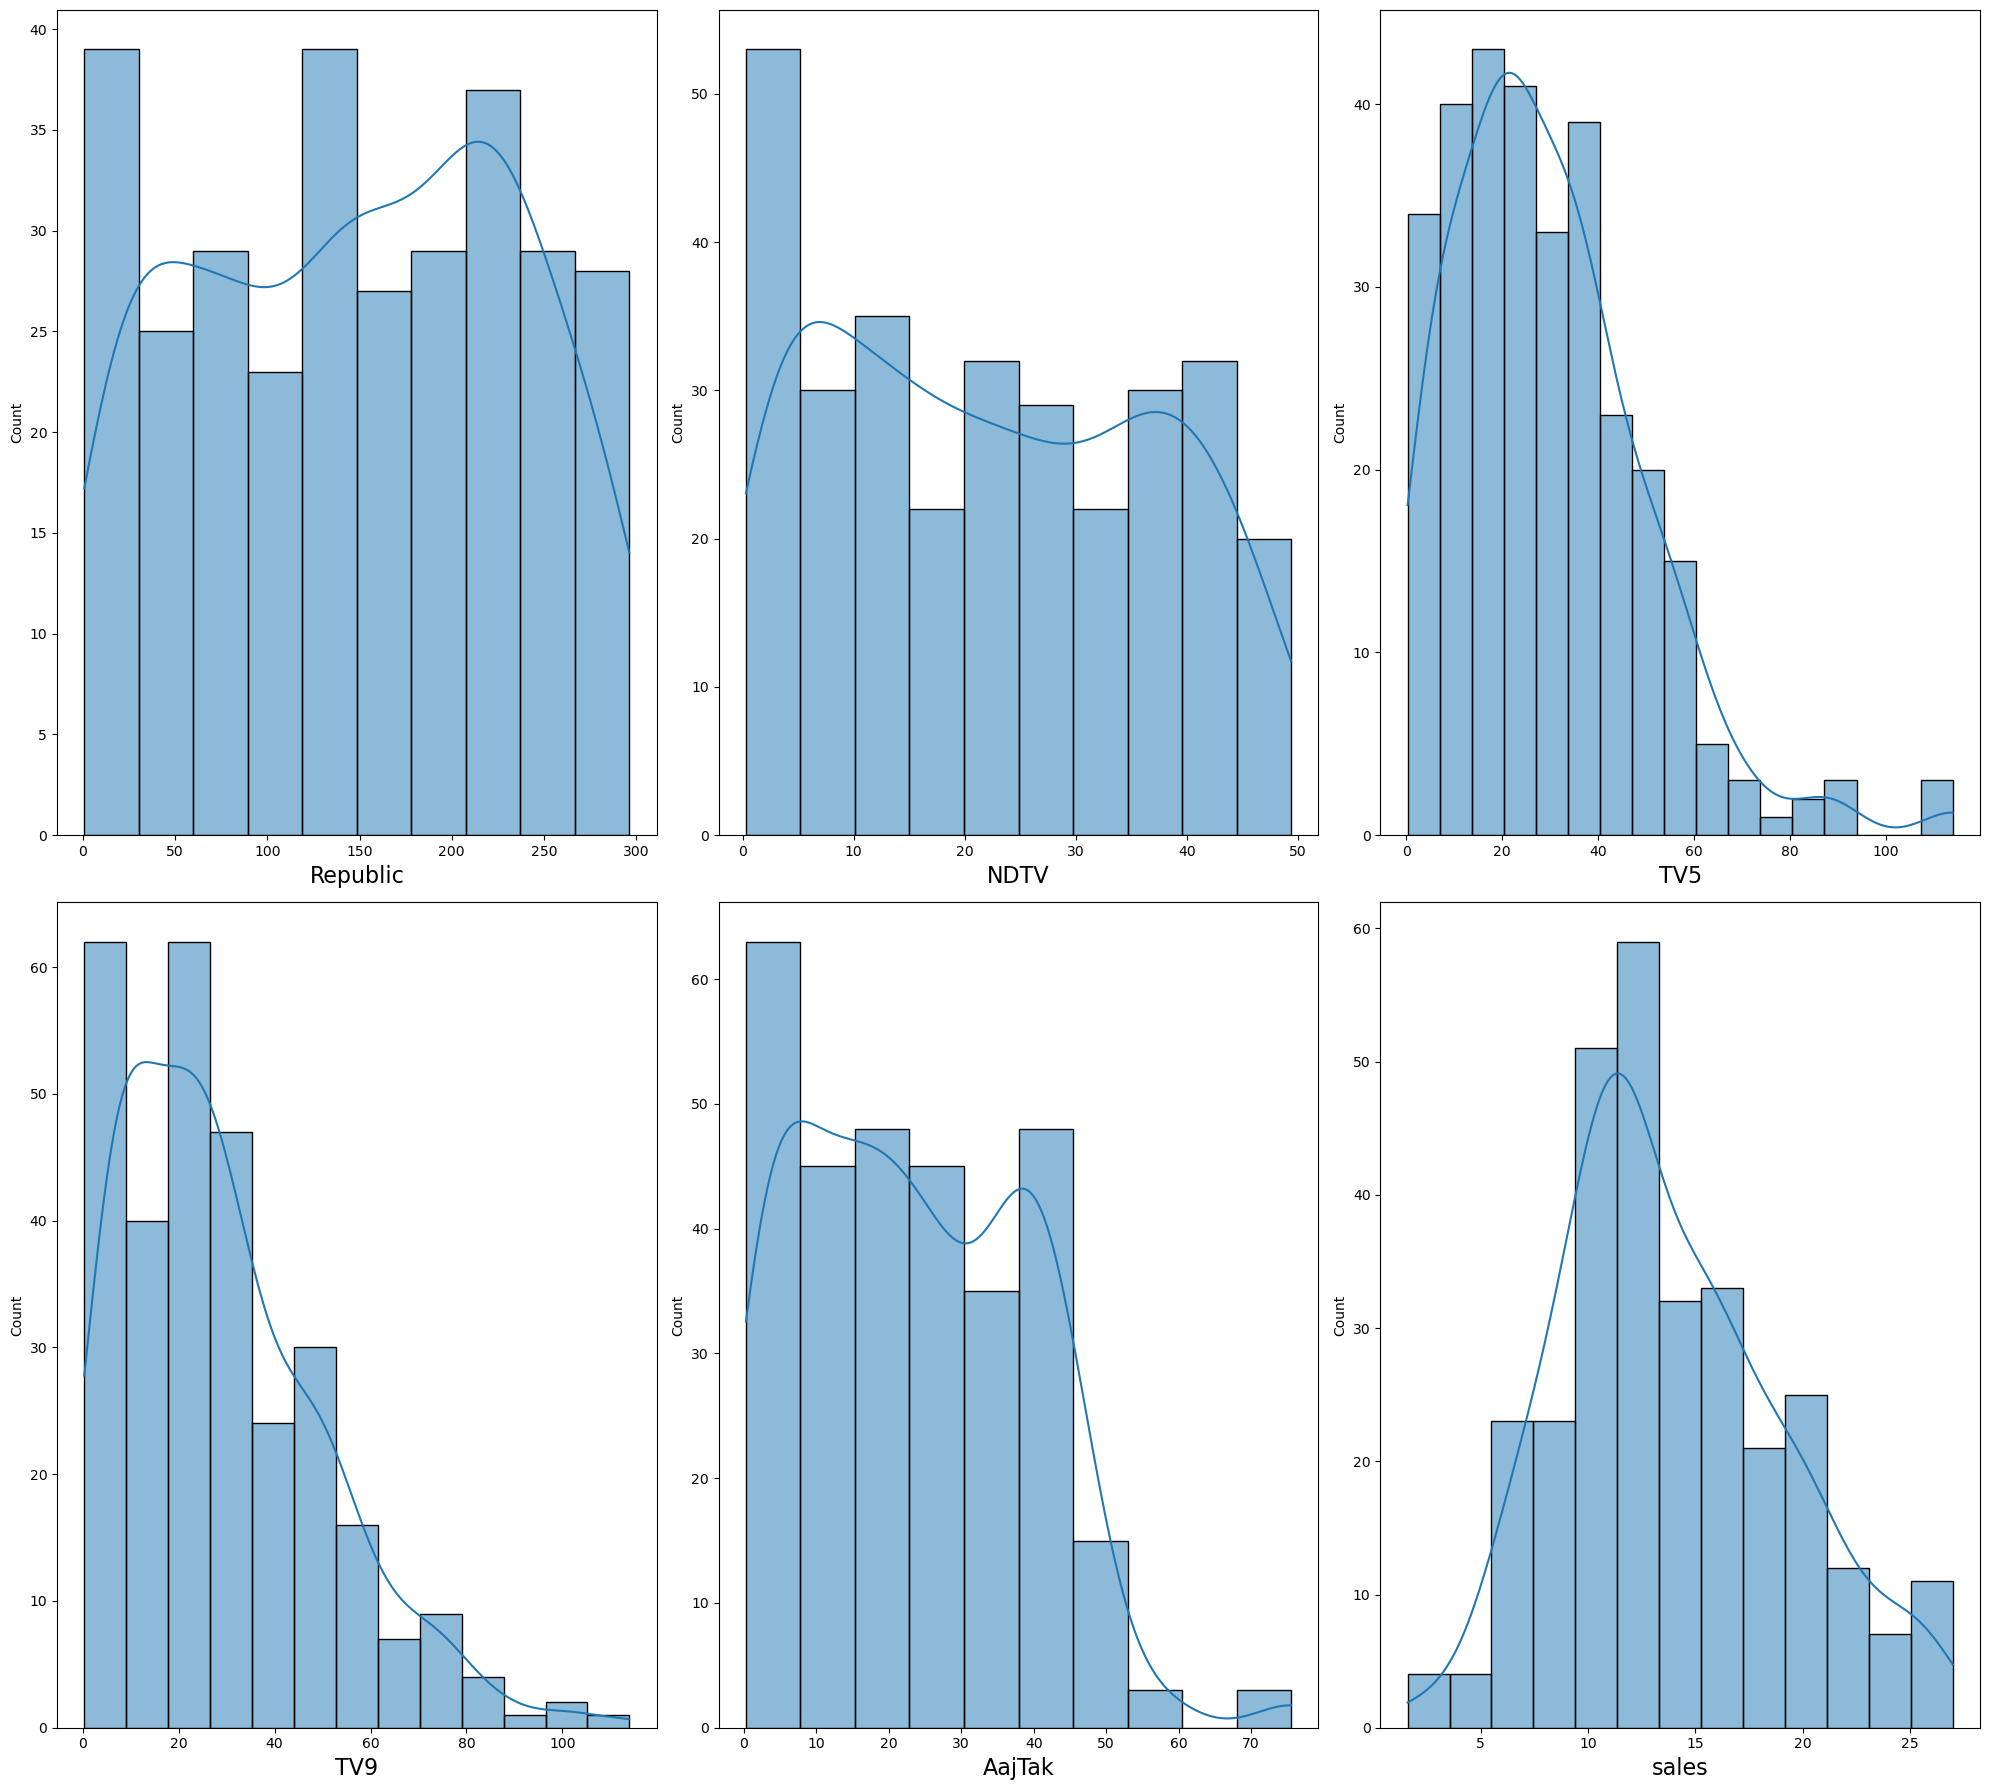

In [10]:
plt.figure(figsize=(20, 18))
plotnumber = 1

for column in df:
    if plotnumber <= 6:
        ax = plt.subplot(2, 3, plotnumber)
        sns.histplot(df[column], kde=True)  # or use sns.kdeplot(df[column]) if you prefer KDE plot
        plt.xlabel(column, fontsize=16)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [11]:
y=df['sales']

In [12]:
y

0       7.2
1      11.8
2      13.2
3       4.8
4      10.6
       ... 
300    15.9
301     6.7
302    10.8
303     9.9
304     5.9
Name: sales, Length: 305, dtype: float64

In [13]:
x=df.drop(columns=['sales'])

In [14]:
x

,Republic,NDTV,TV5,TV9,AajTak
0,8.7,48.9,4.0,75.0,49.0
1,57.5,32.8,65.9,23.5,57.5
2,120.2,19.6,7.2,11.6,18.5
3,8.6,2.1,46.0,1.0,2.6
4,199.8,2.6,52.9,21.2,2.9
...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9
301,18.7,12.1,23.7,23.4,18.7
302,39.5,41.1,17.6,5.8,39.5
303,75.5,10.8,8.3,6.0,75.5


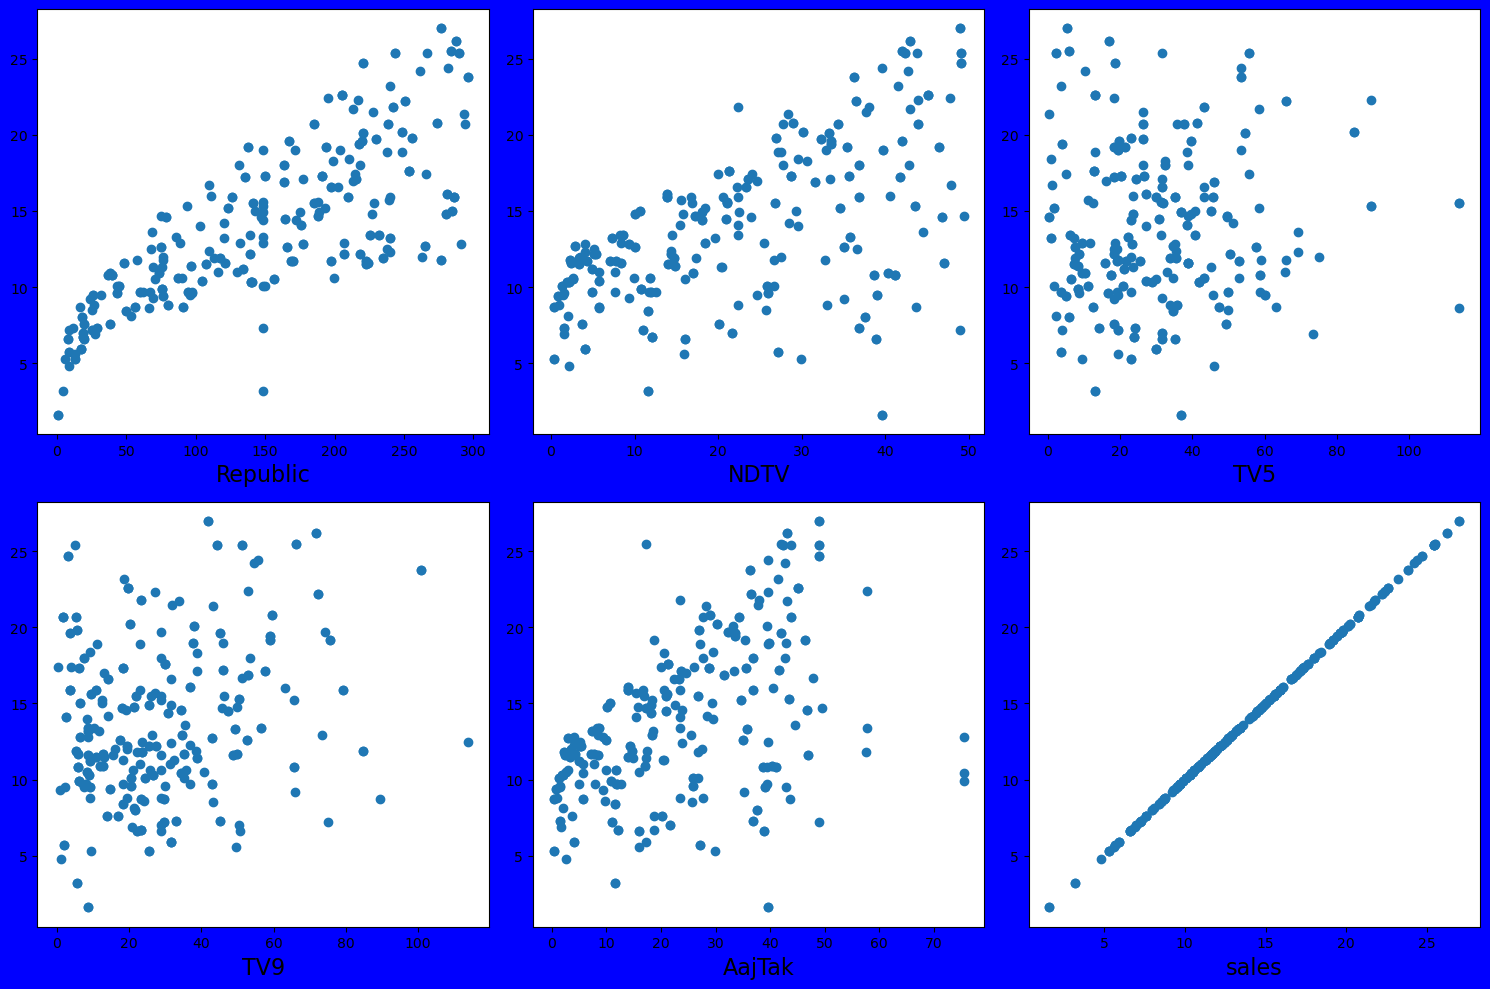

In [15]:
plt.figure(figsize=(15, 10), facecolor='blue')
plotnumber = 1

for column in df:
    if plotnumber <= 6:
        ax = plt.subplot(2, 3, plotnumber)
        plt.scatter(df[column], y)
        plt.xlabel(column, fontsize=16)
        plotnumber += 1

plt.tight_layout()
plt.show()

<Axes: >

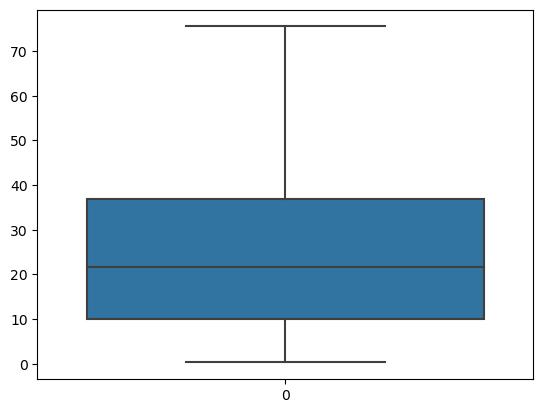

In [16]:
sns.boxplot(df['AajTak'])

In [18]:
scaler =StandardScaler()
x_scaled =scaler.fit_transform(x)


In [19]:
x_scaled

array([[-1.62625562,  1.81463603, -1.25683363,  2.18734018,  1.62336179],
       [-1.05709897,  0.71459436,  1.79894035, -0.25423831,  2.16486391],
       [-0.32582597, -0.18730316, -1.09886147, -0.81840887, -0.31967525],
       ...,
       [-1.2670338 ,  1.28169659, -0.58545195, -1.09338276,  1.01815353],
       [-0.84716414, -0.78856818, -1.04455854, -1.0839009 ,  3.3115743 ],
       [-1.52711973, -1.24634949,  0.02669017,  0.12977695, -0.40249322]])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=300)

In [21]:
y_train.head()

149    18.0
232     9.5
130    11.4
192    11.7
25     21.4
Name: sales, dtype: float64

In [22]:
regression = LinearRegression()

In [23]:
regression.fit(x_train, y_train)

LinearRegression()

In [25]:
pickle.dump(regression, open('reg_model', 'wb'))

In [28]:
regression.score(x_train,y_train)

0.8791200042175594

In [29]:
regression.score(x_test,y_test)

0.8350374696519958

In [30]:
x_test[1]
y_pred=regression.predict(x_test)
y_pred

array([10.0716805 , 19.16921749,  6.21668181,  9.79696416, 16.35236917,
       16.2306758 , 21.02938902, 11.72358517,  4.82358393,  9.47122382,
       15.83619513,  9.82972238, 15.33815949, 18.17674913, 14.76129787,
       18.2997548 , 16.77733686, 16.54552985, 15.26328432,  7.60679115,
       20.25803868, 19.3339961 , 17.81253509, 10.84681799, 16.35236917,
       16.6379873 ,  7.98736411, 18.55641947, 10.32643748, 14.46494527,
       15.12143319, 24.14058222, 14.88578112, 12.33920358,  5.71010778,
       15.69406465, 24.14058222, 11.72358517,  8.08027559, 11.35515188,
       17.93928823, 13.89299408, 12.34303952,  9.80426032,  9.57483064,
       12.48358073, 13.0795192 , 13.42872113, 12.17019316, 17.46158469,
        9.04237876,  6.57074448, 23.97576363, 14.52239414,  9.57483064,
       15.20712388, 12.17019316,  7.38374672, 14.38297891, 13.71517355,
       10.84681799])

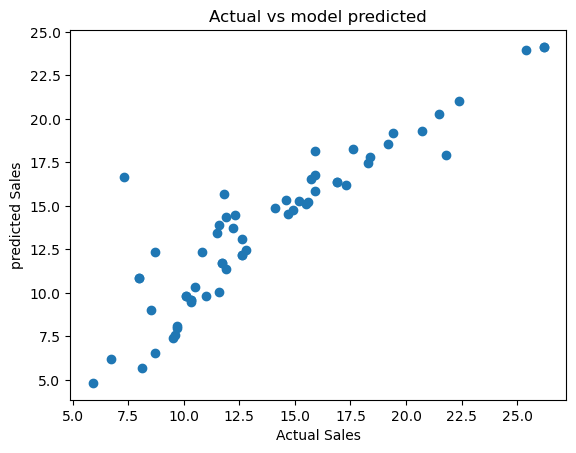

In [31]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("predicted Sales")
plt.title("Actual vs model predicted")
plt.show()